# Genomic Disorder Prediction Project


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
gene = pd.read_csv("/content/train_genomic.csv")

In [85]:
gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [86]:
gene.head(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
5,PID0x44fe,14.0,Yes,No,Yes,No,5.103188,Richard,NaN,Coleston,...,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
6,PID0x28de,3.0,Yes,No,Yes,Yes,4.901080,Mary,NaN,Aydun,...,Multiple,6.825974,normal,0.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
7,PID0x4f8f,3.0,No,No,Yes,Yes,4.964816,Emma,Bryant,Keng,...,Singular,9.836352,inconclusive,0.0,0.0,1.0,NaN,0.0,Single-gene inheritance diseases,Tay-Sachs
8,PID0x8ce3,11.0,No,No,Yes,No,5.209058,Willie,Camacho,Tr,...,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,PID0x8660,4.0,No,Yes,Yes,Yes,4.752272,John,Sandoval,Gregori,...,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [87]:
gene.tail(10)

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
22073,PID0xbd,13.0,Yes,Yes,No,Yes,4.874635,Rosa,NaN,Donovin,...,NaN,NaN,normal,0.0,0.0,0.0,1.0,1.0,NaN,Leigh syndrome
22074,PID0x6a0a,4.0,No,No,NaN,No,4.789307,Randy,Howell,Javontay,...,Multiple,NaN,normal,0.0,0.0,1.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis
22075,PID0x5f56,10.0,No,No,Yes,Yes,4.643860,Edward,Thomas,Eoghan,...,Multiple,9.581455,abnormal,1.0,0.0,0.0,0.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22076,PID0x26b4,0.0,Yes,No,Yes,No,4.931758,Samuel,NaN,Kiril,...,Singular,11.649052,abnormal,1.0,1.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22077,PID0x3656,9.0,No,Yes,Yes,Yes,5.012599,Edward,Hurst,Quientin,...,NaN,12.000000,slightly abnormal,NaN,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22078,PID0x5598,4.0,Yes,Yes,Yes,No,5.258298,Lynn,NaN,Alhassane,...,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,PID0x19cb,8.0,No,Yes,No,Yes,4.974220,Matthew,Farley,Dartanion,...,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,PID0x3c4f,8.0,Yes,No,Yes,No,5.186470,John,NaN,Cavani,...,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,PID0x13a,7.0,Yes,No,Yes,Yes,4.858543,Sharon,NaN,Bomer,...,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome
22082,PID0x9332,11.0,Yes,No,No,No,4.738067,Andrew,Mose,Eban,...,Singular,11.188371,normal,1.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes


In [88]:
# describe the dataset
gene.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
count,20656.000000,22083.000000,16047.000000,16097.000000,19956.0,19931.0,19936.0,19943.0,19913.0,19921.000000,19935.000000,19928.000000,19861.000000,19982.000000,19970.000000,19930.000000
mean,6.974148,4.898871,34.526454,41.972852,0.0,0.0,0.0,1.0,0.0,2.003062,7.486224,0.592483,0.551886,0.536233,0.497747,0.461917
std,4.319475,0.199663,9.852598,13.035501,0.0,0.0,0.0,0.0,0.0,1.411919,2.653393,0.491385,0.497313,0.498698,0.500007,0.498560
min,0.000000,4.092727,18.000000,20.000000,0.0,0.0,0.0,1.0,0.0,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,4.763109,26.000000,31.000000,0.0,0.0,0.0,1.0,0.0,1.000000,5.424703,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,4.899399,35.000000,42.000000,0.0,0.0,0.0,1.0,0.0,2.000000,7.477132,1.000000,1.000000,1.000000,0.000000,0.000000
75%,11.000000,5.033830,43.000000,53.000000,0.0,0.0,0.0,1.0,0.0,3.000000,9.526152,1.000000,1.000000,1.000000,1.000000,1.000000
max,14.000000,5.609829,51.000000,64.000000,0.0,0.0,0.0,1.0,0.0,4.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [89]:
#data type
gene.dtypes

Patient Id                                           object
Patient Age                                         float64
Genes in mother's side                               object
Inherited from father                                object
Maternal gene                                        object
Paternal gene                                        object
Blood cell count (mcL)                              float64
Patient First Name                                   object
Family Name                                          object
Father's name                                        object
Mother's age                                        float64
Father's age                                        float64
Institute Name                                       object
Location of Institute                                object
Status                                               object
Respiratory Rate (breaths/min)                       object
Heart Rate (rates/min                   

In [90]:
print(gene)

      Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418          2.0                    Yes                    No   
1      PID0x25d5          4.0                    Yes                   Yes   
2      PID0x4a82          6.0                    Yes                    No   
3      PID0x4ac8         12.0                    Yes                    No   
4      PID0x1bf7         11.0                    Yes                    No   
...          ...          ...                    ...                   ...   
22078  PID0x5598          4.0                    Yes                   Yes   
22079  PID0x19cb          8.0                     No                   Yes   
22080  PID0x3c4f          8.0                    Yes                    No   
22081   PID0x13a          7.0                    Yes                    No   
22082  PID0x9332         11.0                    Yes                    No   

      Maternal gene Paternal gene  Blood cell count (mcL) Patie

In [91]:
# dataset shape
gene.shape

(22083, 45)

In [92]:
#dataset size
gene.size

993735

In [93]:
# all the columns
gene.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

In [94]:
gene.isnull().sum()

Patient Id                                             0
Patient Age                                         1427
Genes in mother's side                                 0
Inherited from father                                306
Maternal gene                                       2810
Paternal gene                                          0
Blood cell count (mcL)                                 0
Patient First Name                                     0
Family Name                                         9691
Father's name                                          0
Mother's age                                        6036
Father's age                                        5986
Institute Name                                      5106
Location of Institute                                  0
Status                                                 0
Respiratory Rate (breaths/min)                      2149
Heart Rate (rates/min                               2113
Test 1                         

In [95]:
#Droping columns that are not in use
gene.drop(["Patient Id","Patient First Name","Family Name","Father's name","Location of Institute",
          "Institute Name","Test 1","Test 2","Test 3","Test 4","Test 5","Symptom 1","Symptom 2",
           "Symptom 3","Symptom 4","Symptom 5"],inplace=True,axis=1)

In [96]:
# Renaming the columns
gene.rename(columns= {"Patient Age":"patient_age","Genes in mother's side":"mother_genes","Inherited from father":"father_genes",
                      "Maternal gene":"maternal_gene","Paternal gene":"paternal_gene","Blood cell count (mcL)":"blood_count",
                      "Mother's age":"mother_age","Father's age":"father_age","Status":"status",
                      "Respiratory Rate (breaths/min)":"respiratory_rate","Heart Rate (rates/min":"heart_rate","Parental consent":"concent",
                      "Follow-up":"followup","Gender":"gender","Birth asphyxia":"birth_asphyxia","Autopsy shows birth defect (if applicable)":"autopsy_birth_defect",
                      "Place of birth":"birthplace","Folic acid details (peri-conceptional)":"floic_acid","H/O serious maternal illness":"maternal_illness",
                      "H/O radiation exposure (x-ray)":"radiation_exposure","H/O substance abuse":"substance_abuse","Assisted conception IVF/ART":"conception",
                      "History of anomalies in previous pregnancies":"pregnany_status","No. of previous abortion":"abortion_status","Birth defects":"birth_defect",
                      "White Blood cell count (thousand per microliter)":"wbc_count","Blood test result":"blood_test","Genetic Disorder":"gene_disorder",
                      "Disorder Subclass":"disorder_subclass"},inplace=True)

In [97]:
# Transposed summary of the numerical data
gene.describe().T

,count,mean,std,min,25%,50%,75%,max
patient_age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
blood_count,22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
mother_age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
father_age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
abortion_status,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000
wbc_count,19935.0,7.486224,2.653393,3.000000,5.424703,7.477132,9.526152,12.000000


In [98]:
#Information of gene dataset
gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_age           20656 non-null  float64
 1   mother_genes          22083 non-null  object 
 2   father_genes          21777 non-null  object 
 3   maternal_gene         19273 non-null  object 
 4   paternal_gene         22083 non-null  object 
 5   blood_count           22083 non-null  float64
 6   mother_age            16047 non-null  float64
 7   father_age            16097 non-null  float64
 8   status                22083 non-null  object 
 9   respiratory_rate      19934 non-null  object 
 10  heart_rate            19970 non-null  object 
 11  concent               19958 non-null  object 
 12  followup              19917 non-null  object 
 13  gender                19910 non-null  object 
 14  birth_asphyxia        19944 non-null  object 
 15  autopsy_birth_defec

In [99]:
# Drop non-numeric columns
numeric_gene = gene.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_gene.corr()

# Print the correlation matrix
print(correlation_matrix)

                 patient_age  blood_count  mother_age  father_age  \
patient_age         1.000000     0.010819   -0.007588   -0.009797   
blood_count         0.010819     1.000000   -0.007163    0.003303   
mother_age         -0.007588    -0.007163    1.000000   -0.000336   
father_age         -0.009797     0.003303   -0.000336    1.000000   
abortion_status    -0.007281    -0.005995    0.007844    0.000539   
wbc_count          -0.008489    -0.001037    0.015443    0.012954   

                 abortion_status  wbc_count  
patient_age            -0.007281  -0.008489  
blood_count            -0.005995  -0.001037  
mother_age              0.007844   0.015443  
father_age              0.000539   0.012954  
abortion_status         1.000000   0.003807  
wbc_count               0.003807   1.000000  


In [100]:
# Drop non-numeric columns
numeric_gene = gene.select_dtypes(include=['float64', 'int64'])

# Calculating the covariance matrix
covariance_matrix = numeric_gene.cov()

# Print the covariance matrix
print(covariance_matrix)

                 patient_age  blood_count  mother_age  father_age  \
patient_age        18.657865     0.009323   -0.322647   -0.551714   
blood_count         0.009323     0.039865   -0.014055    0.008566   
mother_age         -0.322647    -0.014055   97.073696   -0.042904   
father_age         -0.551714     0.008566   -0.042904  169.924275   
abortion_status    -0.044372    -0.001692    0.108996    0.009893   
wbc_count          -0.097218    -0.000550    0.403425    0.447895   

                 abortion_status  wbc_count  
patient_age            -0.044372  -0.097218  
blood_count            -0.001692  -0.000550  
mother_age              0.108996   0.403425  
father_age              0.009893   0.447895  
abortion_status         1.993515   0.014259  
wbc_count               0.014259   7.040493  


In [101]:
#Looking for all the null value
gene.isna().sum()

patient_age             1427
mother_genes               0
father_genes             306
maternal_gene           2810
paternal_gene              0
blood_count                0
mother_age              6036
father_age              5986
status                     0
respiratory_rate        2149
heart_rate              2113
concent                 2125
followup                2166
gender                  2173
birth_asphyxia          2139
autopsy_birth_defect    4392
birthplace              2124
floic_acid              2117
maternal_illness        2152
radiation_exposure      2153
substance_abuse         2195
conception              2122
pregnany_status         2172
abortion_status         2162
birth_defect            2154
wbc_count               2148
blood_test              2145
gene_disorder           2146
disorder_subclass       2168
dtype: int64

In [102]:
#Looking for Duplicate value
gene.duplicated().sum()

0

In [103]:
# sorting by age
gene.sort_values(by=["patient_age"],inplace=True)

In [104]:
gene

,patient_age,mother_genes,father_genes,maternal_gene,paternal_gene,blood_count,mother_age,father_age,status,respiratory_rate,...,radiation_exposure,substance_abuse,conception,pregnany_status,abortion_status,birth_defect,wbc_count,blood_test,gene_disorder,disorder_subclass
18850,0.0,Yes,No,Yes,No,4.929013,NaN,64.0,Alive,Normal (30-60),...,Yes,Not applicable,Yes,Yes,0.0,Multiple,4.935672,NaN,Multifactorial genetic inheritance disorders,Diabetes
8053,0.0,Yes,No,Yes,No,5.245805,NaN,NaN,Alive,Normal (30-60),...,-,No,NaN,Yes,1.0,NaN,12.000000,NaN,Mitochondrial genetic inheritance disorders,Leigh syndrome
16778,0.0,Yes,Yes,NaN,Yes,5.263795,NaN,NaN,Alive,Tachypnea,...,NaN,Not applicable,Yes,Yes,2.0,Multiple,10.254255,inconclusive,Single-gene inheritance diseases,Cystic fibrosis
19755,0.0,Yes,No,Yes,Yes,5.005476,51.0,NaN,Alive,Tachypnea,...,Yes,Yes,Yes,Yes,4.0,Multiple,9.943009,normal,Single-gene inheritance diseases,Hemochromatosis
5920,0.0,No,No,Yes,Yes,5.186795,50.0,NaN,Deceased,NaN,...,Yes,-,Yes,Yes,1.0,Multiple,7.071765,inconclusive,Mitochondrial genetic inheritance disorders,Leigh syndrome
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22021,NaN,No,No,Yes,No,4.826073,NaN,48.0,Alive,Normal (30-60),...,Not applicable,NaN,Yes,Yes,NaN,Singular,NaN,normal,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22027,NaN,No,Yes,No,No,4.874598,27.0,NaN,Deceased,Tachypnea,...,-,-,No,No,4.0,Multiple,NaN,abnormal,NaN,Tay-Sachs
22051,NaN,Yes,Yes,No,Yes,4.664764,42.0,30.0,Deceased,Normal (30-60),...,No,No,NaN,NaN,4.0,Singular,NaN,normal,NaN,Tay-Sachs
22059,NaN,Yes,Yes,Yes,No,4.813765,38.0,NaN,Deceased,Normal (30-60),...,-,Not applicable,No,No,4.0,Multiple,7.461779,normal,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy


In [105]:
gene.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22083 entries, 18850 to 22062
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_age           20656 non-null  float64
 1   mother_genes          22083 non-null  object 
 2   father_genes          21777 non-null  object 
 3   maternal_gene         19273 non-null  object 
 4   paternal_gene         22083 non-null  object 
 5   blood_count           22083 non-null  float64
 6   mother_age            16047 non-null  float64
 7   father_age            16097 non-null  float64
 8   status                22083 non-null  object 
 9   respiratory_rate      19934 non-null  object 
 10  heart_rate            19970 non-null  object 
 11  concent               19958 non-null  object 
 12  followup              19917 non-null  object 
 13  gender                19910 non-null  object 
 14  birth_asphyxia        19944 non-null  object 
 15  autopsy_birth_defect

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [107]:
# Handling missing values
# Fill missing numerical values with mean
numeric_columns = gene.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
gene[numeric_columns] = imputer.fit_transform(gene[numeric_columns])


In [108]:
# Fill missing categorical values with mode
for column in gene.select_dtypes(include=['object']).columns:
    gene[column].fillna(gene[column].mode()[0], inplace=True)

In [109]:
# Encoding categorical variables
label_encoder = LabelEncoder()
for column in gene.select_dtypes(include=['object']).columns:
    gene[column] = label_encoder.fit_transform(gene[column])

## Exploratory Data Analysis (EDA)

In [110]:
# Summary statistics
print(gene.describe())

        patient_age  mother_genes  father_genes  maternal_gene  paternal_gene  \
count  22083.000000  22083.000000  22083.000000   22083.000000   22083.000000   
mean       6.974148      0.595164      0.391432       0.609383       0.433591   
std        4.177576      0.490871      0.488082       0.487900       0.495582   
min        0.000000      0.000000      0.000000       0.000000       0.000000   
25%        3.000000      0.000000      0.000000       0.000000       0.000000   
50%        6.974148      1.000000      0.000000       1.000000       0.000000   
75%       10.000000      1.000000      1.000000       1.000000       1.000000   
max       14.000000      1.000000      1.000000       1.000000       1.000000   

        blood_count    mother_age    father_age        status  \
count  22083.000000  22083.000000  22083.000000  22083.000000   
mean       4.898871     34.526454     41.972852      0.498121   
std        0.199663      8.398756     11.129291      0.500008   
min       

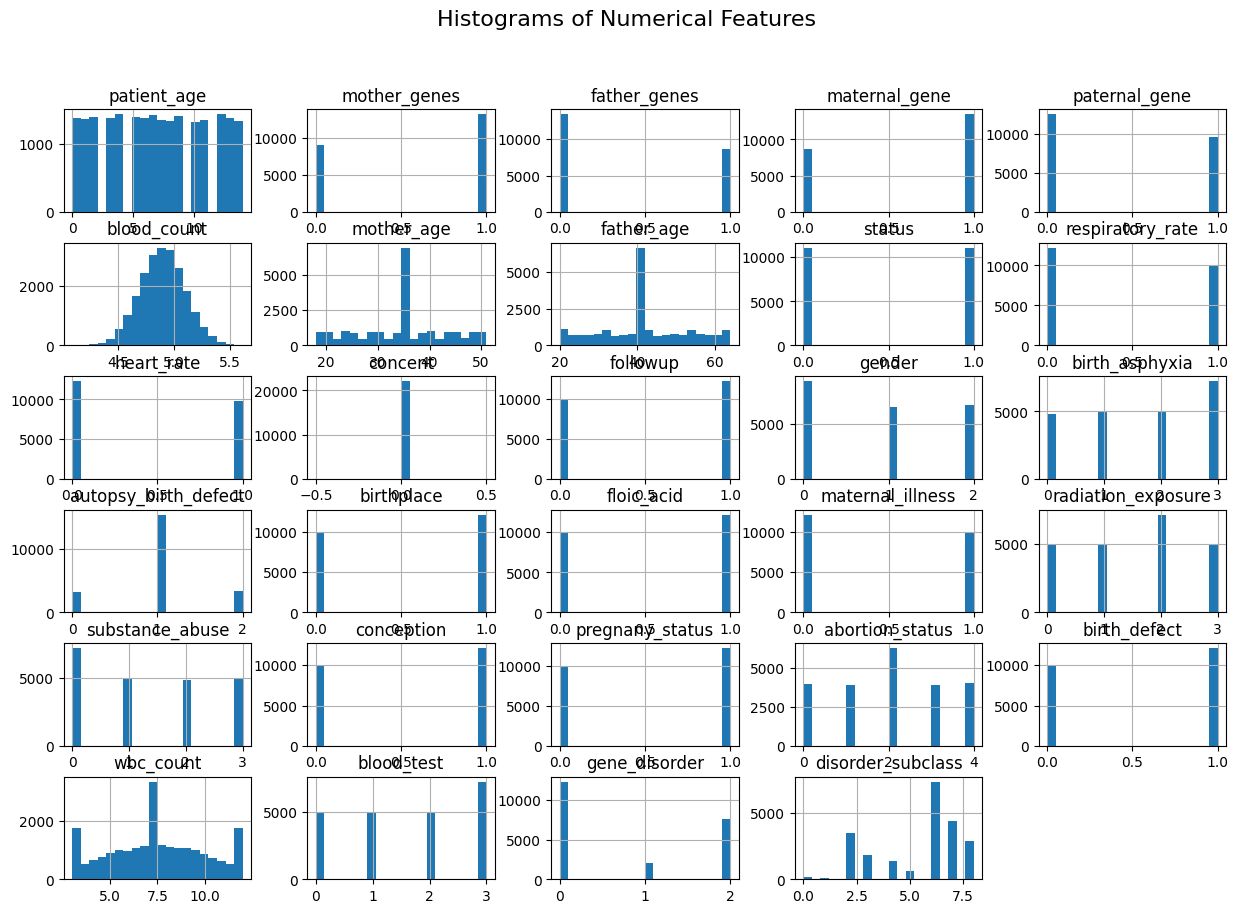

In [111]:
# Histograms
gene.hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

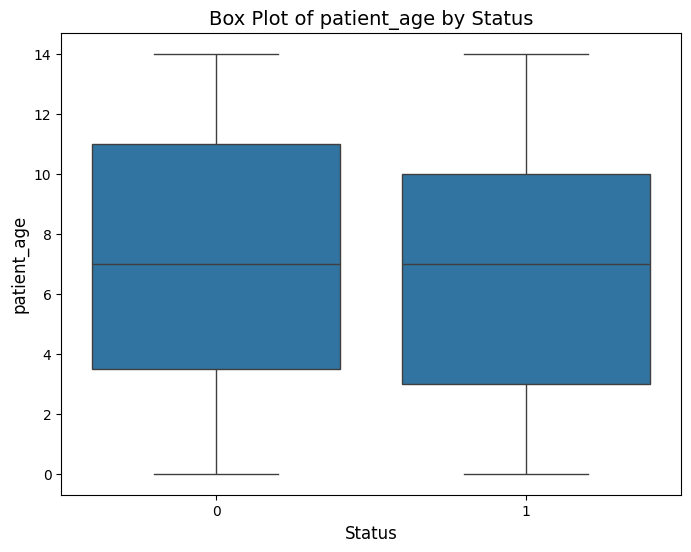

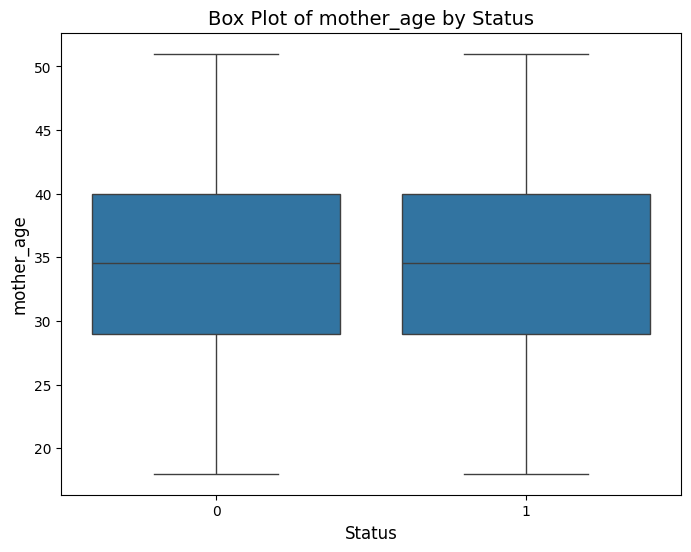

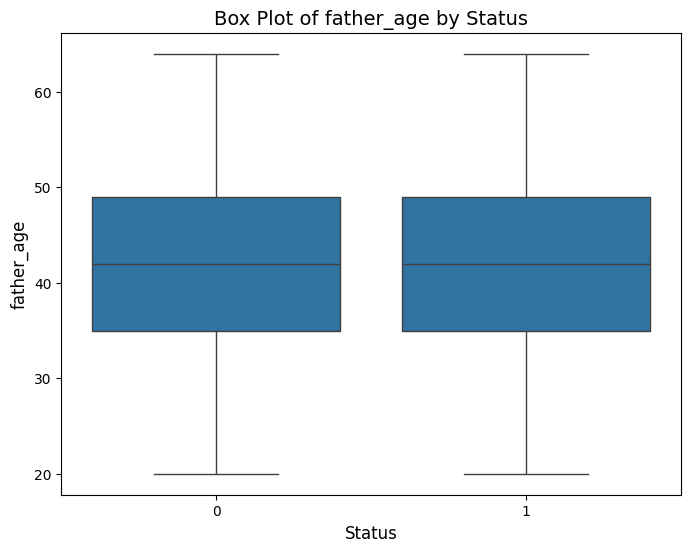

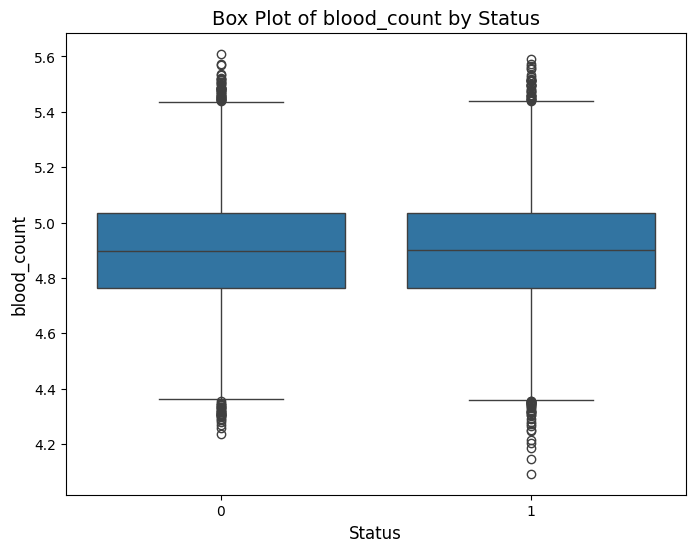

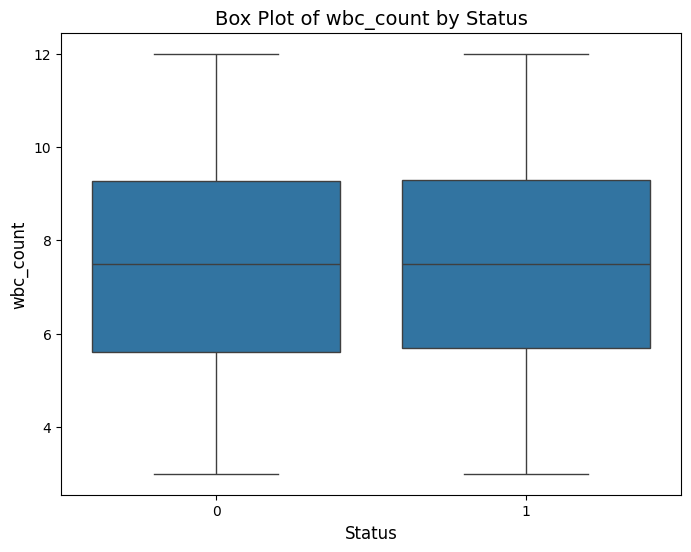

In [112]:
# Box Plots for Numerical Features by Status
numerical_features = ['patient_age', 'mother_age', 'father_age', 'blood_count', 'wbc_count']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='status', y=feature, data=gene)
    plt.title(f'Box Plot of {feature} by Status', fontsize=14)
    plt.xlabel('Status', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.show()

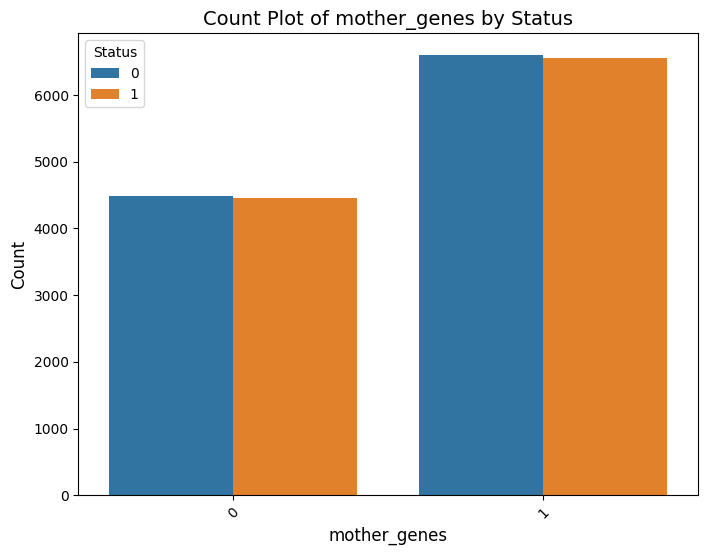

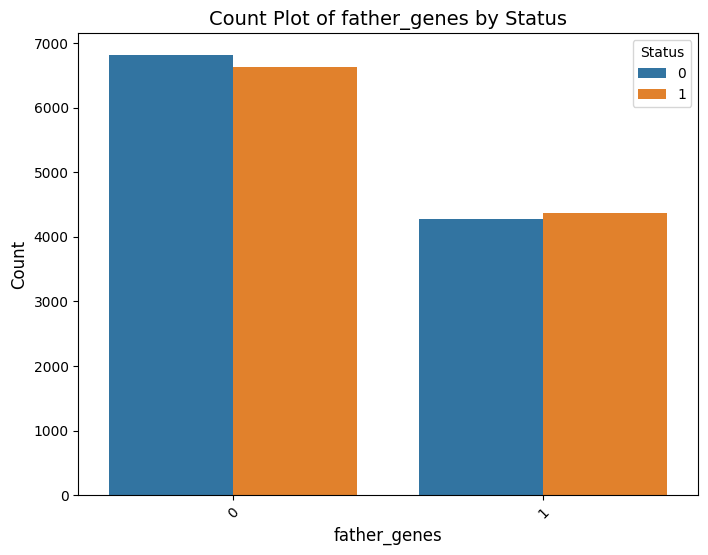

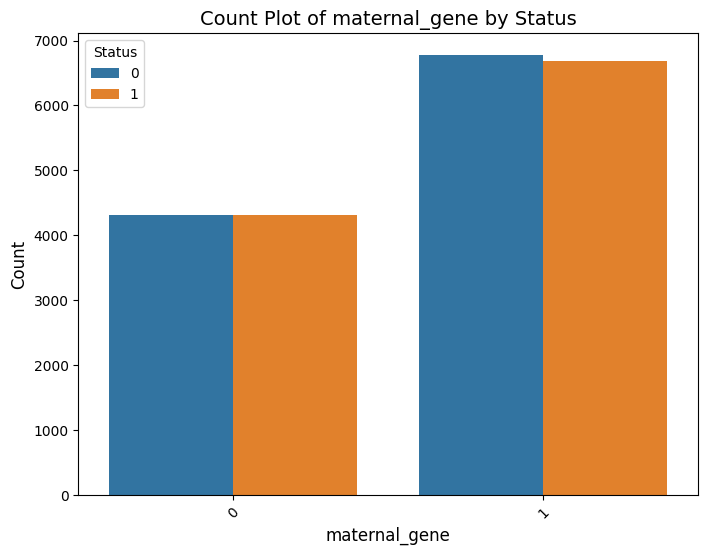

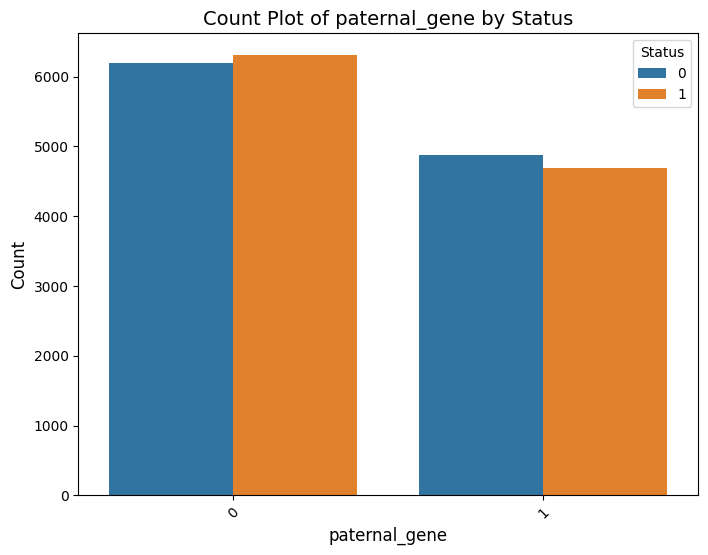

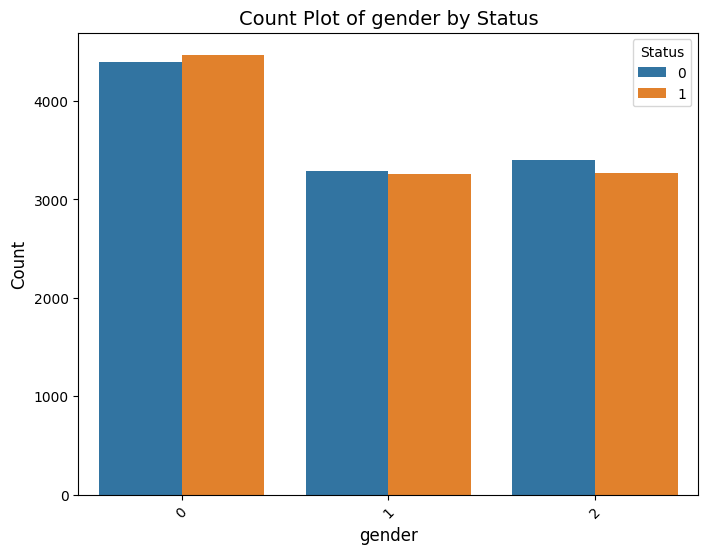

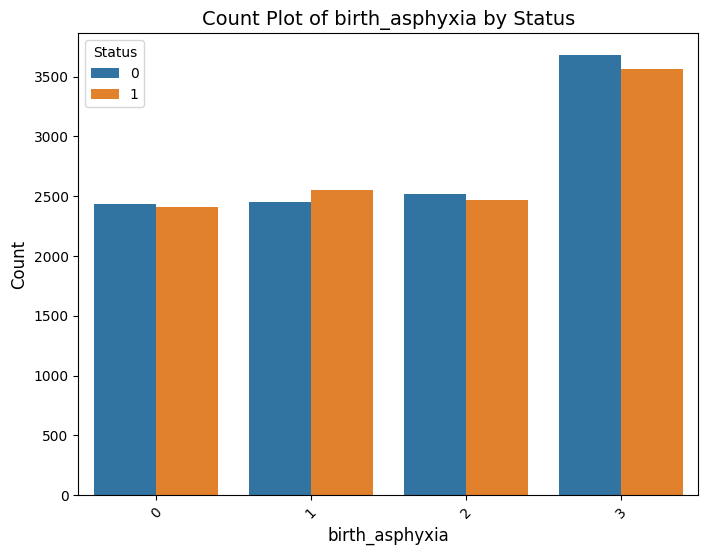

In [113]:
# Count Plots for Categorical Features by Status
categorical_features = ['mother_genes', 'father_genes', 'maternal_gene', 'paternal_gene', 'gender', 'birth_asphyxia']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='status', data=gene)
    plt.title(f'Count Plot of {feature} by Status', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Status', fontsize=10)
    plt.xticks(rotation=45)
    plt.show()

In [114]:
# Compute the correlation matrix
correlation_matrix = gene.corr()

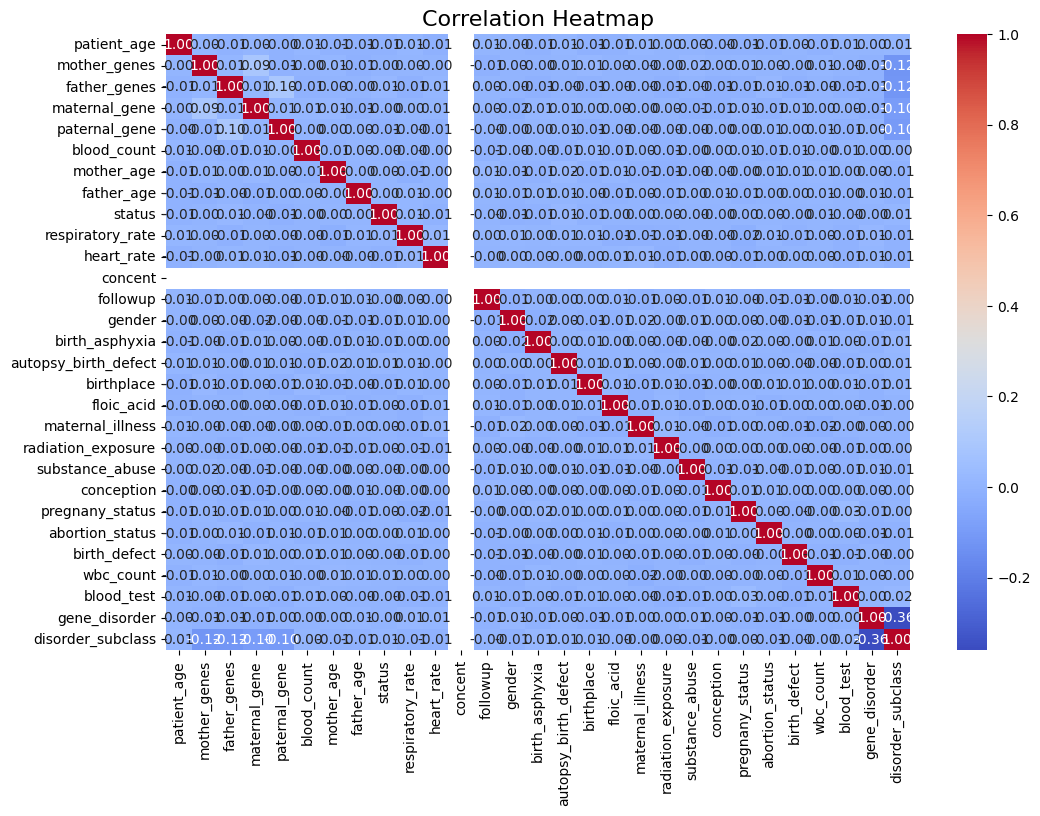

In [115]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Feature Engineering

In [116]:
# 1. Interaction Features
# Create interaction features by multiplying related features
gene['age_product'] = gene['patient_age'] * gene['mother_age']

In [117]:
# 2. Binning
# Bin numerical features into categorical bins
bins = [0, 5, 10, 15]
labels = ['0-5', '6-10', '11-15']
gene['age_group'] = pd.cut(gene['patient_age'], bins=bins, labels=labels)

In [118]:
# 3. One-Hot Encoding
# Convert categorical variables into binary vectors
gene = pd.get_dummies(gene, columns=['age_group'])

## Feature Scaling

In [119]:
# Scale numerical features to a standard range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['patient_age', 'mother_age', 'father_age', 'blood_count', 'wbc_count']
gene[numerical_features] = scaler.fit_transform(gene[numerical_features])

## Feature Selection

In [120]:
# Select relevant features based on domain knowledge or feature importance
selected_features = ['patient_age', 'mother_age', 'father_age', 'blood_count', 'wbc_count', 'age_product']
X = gene[selected_features]

In [121]:
# Display the modified dataset
print(X.head())

       patient_age  mother_age  father_age  blood_count  wbc_count  \
18850    -1.669462    0.000000     1.97925     0.150966  -1.011729   
8053     -1.669462    0.000000     0.00000     1.737640   1.790483   
16778    -1.669462    0.000000     0.00000     1.827741   1.097997   
19755    -1.669462    1.961471     0.00000     0.533937   0.974535   
5920     -1.669462    1.842403     0.00000     1.442085  -0.164404   

       age_product  
18850          0.0  
8053           0.0  
16778          0.0  
19755          0.0  
5920           0.0  


## Model Selection and Training

In [122]:
# Define features and target variable
X = gene.drop(['status', 'disorder_subclass'], axis=1)
y = gene['status']

In [123]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [124]:
# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Model Evaluation

In [125]:
# Make predictions
y_pred = model.predict(X_test)

In [126]:
# Evaluate model accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7960153950645235


In [127]:
# Generate classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83      2197
           1       0.99      0.60      0.75      2220

    accuracy                           0.80      4417
   macro avg       0.85      0.80      0.79      4417
weighted avg       0.85      0.80      0.79      4417



## Model Interpretation

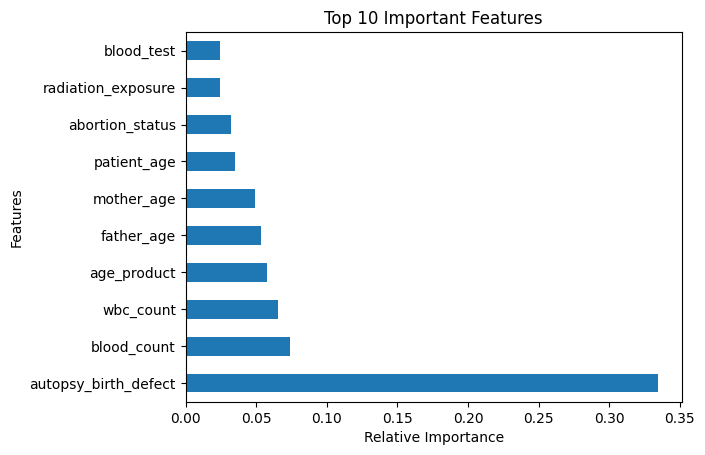

In [128]:
# Displaying the Important Feactures
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()